Using Google Colab, please try to a program for following tasks:

* Down sampling (Max, Median, Mean)
* Up Sampling (Nearest Neighbor, Bilinear, Bicubic)

Create your notebook with name as "PCD_Assignment01", and upload to your github project. You need to provide your Github Project link to the text editor in submission form.

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# DownSampling (Max, Median, Mean)

In [2]:
def downsampling(img, target_shape, method):
    h, w = img.shape
    target_h, target_w = target_shape

    if h % target_h == 0 and w % target_w == 0:
        block_h = h // target_h
        block_w = w // target_w
        out = np.zeros((target_h, target_w), dtype=float)

        for i in range(target_h):
            for j in range(target_w):
                block = img[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w]

                if method == "mean":
                    out[i, j] = np.mean(block)
                elif method == "median":
                    out[i, j] = np.median(block)
                elif method == "max":
                    out[i, j] = np.max(block)
        return out
    else:
      # if the blocks are not visible (not easy to block)
        resized = cv2.resize(img.astype(np.float32), (target_w, target_h), interpolation=cv2.INTER_AREA)
        return resized

In [22]:
img = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9,10,11,12],
    [13,14,15,16]
])

print("Downsampling target size 2x2 (Mean)", downsampling(img, (2,2), "mean"))
print("Downsampling target size 3x3 (Mean)", downsampling(img, (3,3), "mean"))
print("Downsampling target size 2x2 (Median)", downsampling(img, (2,2), "median"))
print("Downsampling target size 3x3 (Median)", downsampling(img, (3,3), "median"))
print("Downsampling target size 2x2 (Max)", downsampling(img, (2,2), "max"))
print("Downsampling target size 3x3 (Max)", downsampling(img, (3,3), "max"))

Downsampling target size 2x2 (Mean) [[ 3.5  5.5]
 [11.5 13.5]]
Downsampling target size 3x3 (Mean) [[ 2.25  3.5   4.75]
 [ 7.25  8.5   9.75]
 [12.25 13.5  14.75]]
Downsampling target size 2x2 (Median) [[ 3.5  5.5]
 [11.5 13.5]]
Downsampling target size 3x3 (Median) [[ 2.25  3.5   4.75]
 [ 7.25  8.5   9.75]
 [12.25 13.5  14.75]]
Downsampling target size 2x2 (Max) [[ 6.  8.]
 [14. 16.]]
Downsampling target size 3x3 (Max) [[ 2.25  3.5   4.75]
 [ 7.25  8.5   9.75]
 [12.25 13.5  14.75]]


In [16]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://neptune.ai/wp-content/uploads/2022/10/gaussian-before-1.png")
img = Image.open(BytesIO(response.content)).convert("L")
img_matrix = np.array(img)

print("Ukuran asli gambar:", img_matrix.shape)
print("Matrix:", img_matrix)

Ukuran asli gambar: (407, 413)
Matrix: [[234 226 156 ... 175 173 168]
 [231 221 152 ... 173 171 166]
 [226 216 147 ... 175 171 166]
 ...
 [123 105  77 ... 149 153 154]
 [124 105  76 ...  44  45  45]
 [125 107  76 ...  44  44  44]]


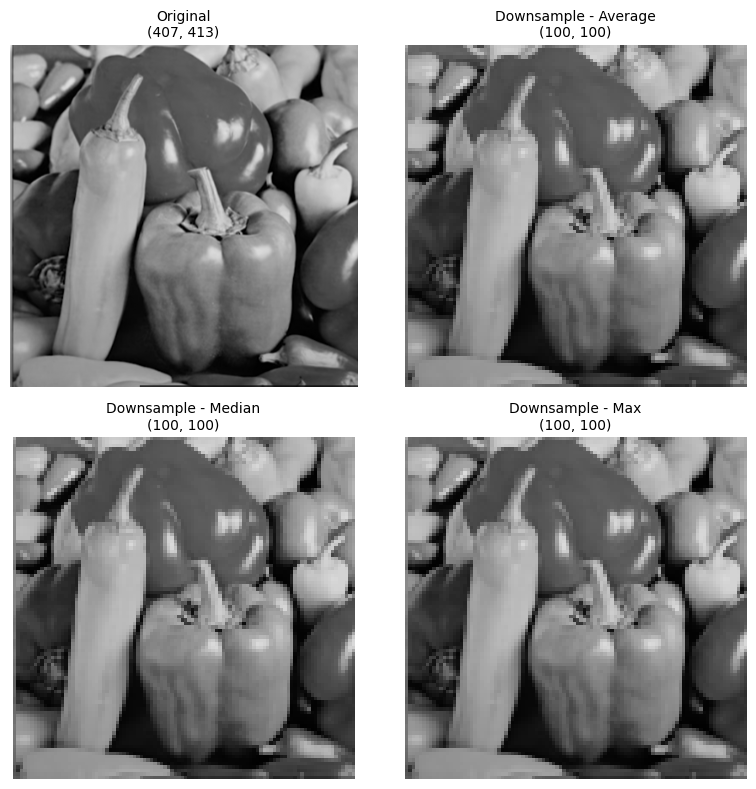

In [20]:
downsampling_avg = downsampling(img_matrix, (100,100), "mean")
downsampling_med = downsampling(img_matrix, (100,100), "median")
downsampling_max = downsampling(img_matrix, (100,100), "max")

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

datasets = [img_matrix, downsampling_avg, downsampling_med, downsampling_max]
titles = [
    f"Original\n{img_matrix.shape}",
    f"Downsample - Average\n{downsampling_avg.shape}",
    f"Downsample - Median\n{downsampling_med.shape}",
    f"Downsample - Max\n{downsampling_max.shape}"
]

for ax, data, title in zip(axes.ravel(), datasets, titles):
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=255)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

#Up Sampling (NN, BL, BC)

## Nearest Neighbors

In [4]:
def upsampling_nn(img, target_shape):
    h, w = img.shape
    target_h, target_w = target_shape
    out = np.zeros((target_h, target_w))

    for i in range(target_h):
        for j in range(target_w):
            # find smallest neighbor
            orig_i = int(i * h / target_h)
            orig_j = int(j * w / target_w)

            out[i, j] = img[orig_i, orig_j]
    return out

In [5]:
img = np.array([
    [2, 6, 8],
    [1, 3, 7],
    [4, 5, 9]
])

print(upsampling_nn(img, (5,5)))

[[2. 2. 6. 6. 8.]
 [2. 2. 6. 6. 8.]
 [1. 1. 3. 3. 7.]
 [1. 1. 3. 3. 7.]
 [4. 4. 5. 5. 9.]]


## Bilinear

In [6]:
def upsampling_bl(img, target_shape):
    h, w = img.shape
    new_h, new_w = target_shape
    out = np.zeros((new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            y = i * (h - 1) / (new_h - 1)
            x = j * (w - 1) / (new_w - 1)

            y0 = int(np.floor(y))
            x0 = int(np.floor(x))
            y1 = min(y0 + 1, h - 1)
            x1 = min(x0 + 1, w - 1)

            dy = y - y0
            dx = x - x0

            top = round((1 - dx) * img[y0, x0] + dx * img[y0, x1])
            bottom = round((1 - dx) * img[y1, x0] + dx * img[y1, x1])
            value = round((1 - dy) * top + dy * bottom)

            out[i, j] = value

    return out

In [7]:
img = np.array([
    [2, 6, 8],
    [1, 3, 7],
    [4, 5, 9]
])

print(upsampling_bl(img, (5,5)))

[[2. 4. 6. 7. 8.]
 [2. 3. 4. 6. 8.]
 [1. 2. 3. 5. 7.]
 [2. 3. 4. 6. 8.]
 [4. 4. 5. 7. 9.]]


## Bicubic

In [8]:
def cubic_weight(t):
    t = abs(t)
    if t <= 1:
        return (1.5 * t - 2.5) * t * t + 1
    elif t < 2:
        return ((-0.5 * t + 2.5) * t - 4) * t + 2
    else:
        return 0

In [9]:
def upsampling_bc(img, target_shape):
    h, w = img.shape
    new_h, new_w = target_shape
    out = np.zeros((new_h, new_w))

    for i in range(new_h):
        for j in range(new_w):
            y = i * h / new_h
            x = j * w / new_w

            y0 = int(np.floor(y))
            x0 = int(np.floor(x))

            value = 0
            total_weight = 0

            for m in range(-1, 3):
                for n in range(-1, 3):
                    yy = min(max(y0 + m, 0), h - 1)
                    xx = min(max(x0 + n, 0), w - 1)

                    wy = cubic_weight(y - (y0 + m))
                    wx = cubic_weight(x - (x0 + n))
                    wght = wy * wx

                    value += img[yy, xx] * wght
                    total_weight += wght

            out[i, j] = round(value / total_weight) if total_weight != 0 else 0

    return out

In [23]:
img = np.array([
    [2, 6, 8],
    [1, 3, 7],
    [4, 5, 9]
])

print(upsampling_bc(img, (5,5)))

[[2. 4. 7. 8. 8.]
 [1. 3. 5. 7. 7.]
 [1. 2. 4. 7. 8.]
 [4. 4. 5. 8. 9.]
 [4. 5. 6. 9. 9.]]


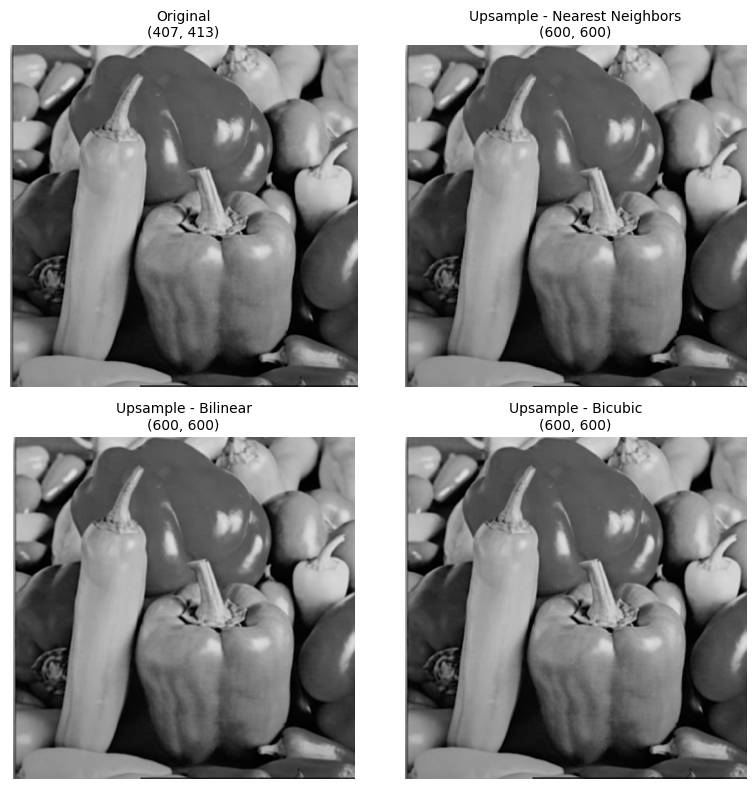

In [24]:
upsampling_nn_res = upsampling_nn(img_matrix, (600,600))
upsampling_bl_res = upsampling_bl(img_matrix, (600,600))
upsampling_bc_res = upsampling_bc(img_matrix, (600,600))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

datasets = [img_matrix, upsampling_nn_res, upsampling_bl_res, upsampling_bc_res]
titles = [
    f"Original\n{img_matrix.shape}",
    f"Upsample - Nearest Neighbors\n{upsampling_nn_res.shape}",
    f"Upsample - Bilinear\n{upsampling_bl_res.shape}",
    f"Upsample - Bicubic\n{upsampling_bc_res.shape}"
]

for ax, data, title in zip(axes.ravel(), datasets, titles):
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=255)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()